In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from os import chdir
chdir('../')
from util import (
    load_3d_data,
    create_rotation_matrix,
    create_affine_matrix,
    similarity_transform_volumes,
    vrrotvec2mat,
    vrrotmat2vec,
)


In [2]:
data_path = './SampleData/nT37template.nii'

In [3]:
img, img_affine = load_3d_data(data_path)

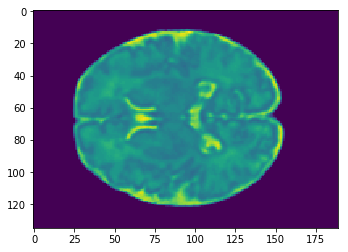

In [4]:
plt.imshow(img[:,:,90])

In [5]:
affine, rotation = create_affine_matrix([0.98,1.02],
                             [-20,20],
                             [-3,3],
                             img.shape)

In [7]:
target_size = [128, 128, 128]
img_t, transform = similarity_transform_volumes(
    img,
    affine,
    target_size,
)

/usr/local/lib/python2.7/dist-packages/nilearn/image/resampling.py:518: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


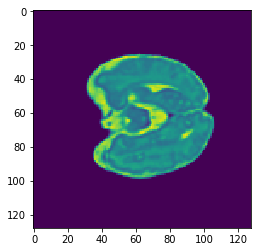

In [8]:
plt.imshow(img_t[:,:,60])

In [9]:
print(rotation)

[ 15.80688631  10.89519053  -3.1164677 ]


In [13]:
rotation_matrix = create_rotation_matrix(rotation)
print(rotation_matrix)

[[ 0.98052233  0.1037202   0.16678755]
 [-0.05338584  0.95796317 -0.28188031]
 [-0.18901302  0.26748584  0.94484147]]


In [15]:
vector = vrrotmat2vec(rot)
print(vector)

[[ 0.81615883]
 [ 0.52859058]
 [-0.23340259]
 [ 0.34325704]
 [ 1.        ]]


In [16]:
back_rot_matrix = vrrotvec2mat(vector)
print(back_rot_matrix)

[[ 0.98052233  0.1037202   0.16678755]
 [-0.05338584  0.95796317 -0.28188031]
 [-0.18901302  0.26748584  0.94484147]]
